In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
#os.chdir(r"C:\Users\Vaishanavi\Downloads\Refactored_Py_DS_ML_Bootcamp-master\Github Repo\Patient Readmission")
df = pd.read_csv("diabetic_data_kaggle.csv")
#df = pd.read_csv("C:\Users\Vaishanavi\Downloads\Refactored_Py_DS_ML_Bootcamp-master\Github Repo\Patient Readmission\diabetic_data_kaggle.csv")

In [52]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [54]:
for col in df.columns:
    if df[col].dtype == object:
        print(col, df[col][df[col]=='?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [55]:
df['gender'].unique()
print ('gender', df['gender'][df['gender']=='Unknown/Invalid'].count())

gender 3


In [56]:
df['race'].unique()
print ('race', df['race'][df['race']=='?'].count())

race 2273


In [57]:
df = df.drop(['weight','payer_code','medical_specialty'],axis=1)

In [58]:
df = df.drop(set(df[(df['diag_1']=='?')&(df['diag_2']=='?')&(df['diag_3']=='?')].index))

In [59]:
df = df.drop(set(df[df['discharge_disposition_id']==11].index))
df = df.drop(set(df[df['gender']=='Unknown/Invalid'].index))
df = df.drop(set(df[df['race']=='?'].index))

In [60]:
df['citoglipton'].unique()

array(['No'], dtype=object)

In [61]:
df['examide'].unique()

array(['No'], dtype=object)

In [62]:
df = df.drop(['citoglipton','examide','encounter_id','patient_nbr'],axis=1)

In [63]:
df.shape

(97883, 43)

In [64]:
for col in df.columns:
    if df[col].dtype == object:
        print(col, df[df[col]=='?'].count())

race race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolaz

In [65]:
df['metformin'].value_counts()

metformin
No        78449
Steady    17833
Up         1039
Down        562
Name: count, dtype: int64

In [66]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    col_temp = str(col) + '_temp'
    df[col_temp] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

for col in keys:
    col_temp = str(col) + '_temp'
    df[col] = df[col_temp]

df['num_col'] = 0
for col in keys:
    col_temp = str(col) + '_temp'
    df['num_col'] = df['num_col'] + df[col_temp]
    del df[col_temp]

df['num_col'].value_counts()
    


num_col
0    71177
1    25307
2     1288
3      106
4        5
Name: count, dtype: int64

In [67]:
#Encoding

df.replace({
    'change': {'Ch': 1, 'No': 0},
    'gender': {'Male': 1, 'Female': 0},
    'diabetesMed': {'Yes': 1, 'No': 0}
}, inplace=True)

/var/folders/m3/xllg8hhj1dzfpggfd1h9glgm0000gn/T/ipykernel_3360/3071427049.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [68]:
df['A1Cresult'].unique()
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [69]:
df.replace({
    'A1Cresult':{'>7':1,'>8':1,'Norm':0,np.NaN:-99},
    'max_glu_serum':{np.NaN:-99,'Norm':0,'>300':1,'>200':1}
},inplace=True)

df.head(5).T

/var/folders/m3/xllg8hhj1dzfpggfd1h9glgm0000gn/T/ipykernel_3360/4024973223.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,0,0,1,1
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [71]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i)+5)
df['age'].value_counts()

/var/folders/m3/xllg8hhj1dzfpggfd1h9glgm0000gn/T/ipykernel_3360/1372604180.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i)+5)


age
75    24978
65    21699
55    16743
85    16320
45     9408
35     3689
95     2601
25     1604
15      682
5       159
Name: count, dtype: int64

<Axes: xlabel='num_col', ylabel='count'>

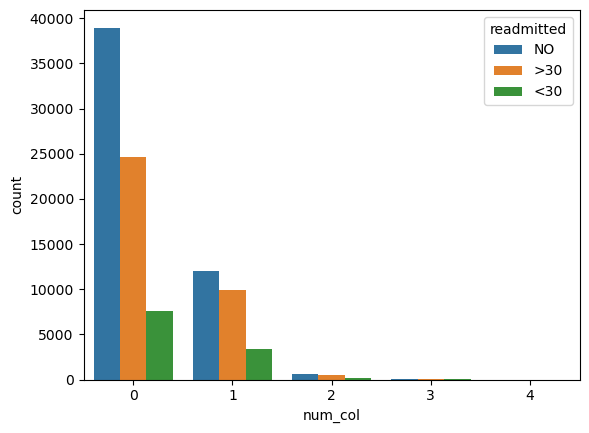

In [72]:
sns.countplot(df,x='num_col',hue='readmitted')